In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
from sklearn.cluster import KMeans
import numpy as np
pd.set_option('display.width', 2000)

In [3]:
nucleus_df = pd.read_csv('csv/nuclei_ctcf.csv')

  Condition  Ch2Intensity
0    Contra      6.060679
1      Ipsi      7.518858
2      Sham      7.847855


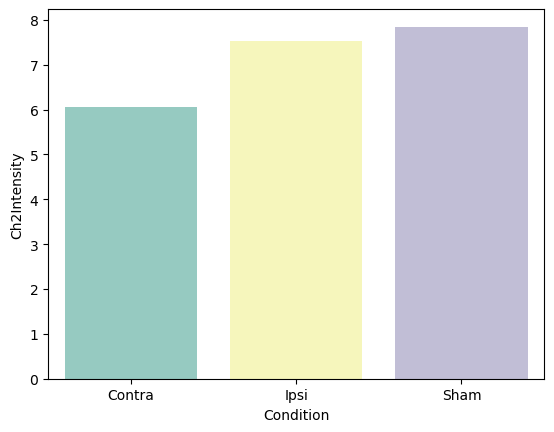

In [4]:
mean_intensity = nucleus_df.groupby('Condition')['Ch2Intensity'].mean().reset_index()

print(mean_intensity)

# Plotting
sns.barplot(data=mean_intensity, x='Condition', y='Ch2Intensity', palette='Set3')
plt.show()

In [5]:
nucleus_df = nucleus_df[nucleus_df['CellType'].isin(['neunPositive', 'neunPositiveLow'])]
print(nucleus_df)
print(len(nucleus_df[nucleus_df['CellType']=='neunPositiveLow']))
print(nucleus_df['Location'].unique())

       Condition                                          ImageName  Label    Area                                           Centroid         CellType  Location  Ch1Intensity  Ch2Intensity  Ch3Intensity  Ch4Intensity  CytoCh1Intensity  CytoCh2Intensity  CytoCh3Intensity  CytoCh4Intensity
0         Contra  HI 10 Contralaterall NeuNpink CTCFgreen 40x 4x...      1  4157.0  (3.9184508058696177, 2780.271830647101, 1671.4...     neunPositive       NaN     75.590089     10.662016     19.933847           NaN               NaN               NaN               NaN               NaN
1         Contra  HI 10 Contralaterall NeuNpink CTCFgreen 40x 4x...      2  3836.0  (4.014598540145985, 2004.8052659019813, 1160.4...  neunPositiveLow       NaN     52.241397     13.517987     20.687174           NaN               NaN               NaN               NaN               NaN
2         Contra  HI 10 Contralaterall NeuNpink CTCFgreen 40x 4x...      3  4085.0  (3.2107711138310893, 1692.036230110159, 1044.3...

   Condition                                          ImageName  Ch2Intensity
0     Contra  HI 10 Contralaterall NeuNpink CTCFgreen 40x 4x...     10.005760
1     Contra  HI 10 Contralaterall NeuNpink CTCFgreen 40x 4x...     10.794769
2     Contra  HI 11 Contralaterall NeuNpink CTCFgreen 40x 4x...      5.272478
3     Contra  HI 11 Contralaterall NeuNpink CTCFgreen 40x 4x...     10.119870
4     Contra  HI 8 Contralaterall NeuNpink CTCFgreen 40x 4x4...      4.895553
5     Contra  HI 8 Contralaterall NeuNpink CTCFgreen 40x 4x4...      5.130056
6       Ipsi  HI 10 Ipsilateral NeuNpink CTCFgreen 40x 4x4 1...     10.095356
7       Ipsi  HI 10 Ipsilateral NeuNpink CTCFgreen 40x 4x4 2...      8.576623
8       Ipsi  HI 11 Ipsilateral NeuNpink CTCFgreen 40x 4x4 1...     10.279678
9       Ipsi  HI 11 Ipsilateral NeuNpink CTCFgreen 40x 4x4 2...     14.199930
10      Ipsi  HI 8 Ipsilateral NeuNpink CTCFgreen 40x 4x4 1.lsm      7.057629
11      Ipsi  HI 8 Ipsilateral NeuNpink CTCFgreen 40x 4x4 2.lsm 

c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


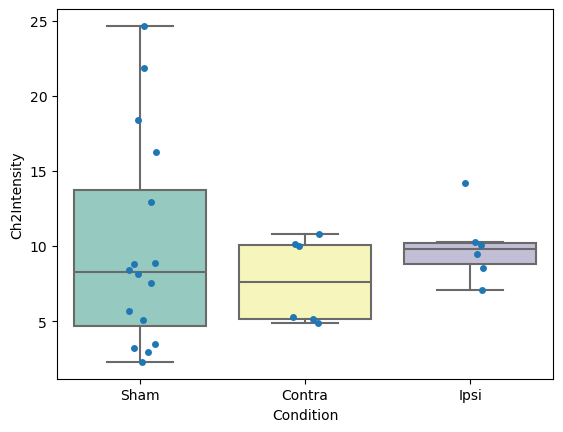

In [14]:
order =['Sham', 'Contra', 'Ipsi']
mean_ch3_intensity = nucleus_df.groupby(['Condition', 'ImageName'])['Ch2Intensity'].mean().reset_index()
#mean_ch3_intensity = mean_ch3_intensity.drop([12,13,14,15])
print(mean_ch3_intensity)
sns.boxplot(data=mean_ch3_intensity, showfliers = False, x='Condition', y='Ch2Intensity', order=order, palette='Set3')
sns.stripplot(data=mean_ch3_intensity, x='Condition', y='Ch2Intensity', order=order)
plt.show()

In [15]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(mean_ch3_intensity.keys())

anova_results = f_oneway(mean_ch3_intensity[mean_ch3_intensity['Condition'] == 'Contra']['Ch2Intensity'],
                         mean_ch3_intensity[mean_ch3_intensity['Condition'] == 'Ipsi']['Ch2Intensity'],
                         mean_ch3_intensity[mean_ch3_intensity['Condition'] == 'Sham']['Ch2Intensity'])

# Perform Tukey HSD post hoc test
tukey_results = pairwise_tukeyhsd(mean_ch3_intensity['Ch2Intensity'], mean_ch3_intensity['Condition'])

print("ANOVA Results:")
print("F-statistic:", anova_results.statistic)
print("p-value:", anova_results.pvalue)

print("\nTukey HSD Results:")
print(tukey_results)

Index(['Condition', 'ImageName', 'Ch2Intensity'], dtype='object')
ANOVA Results:
F-statistic: 0.36386742567934666
p-value: 0.6986034361869975

Tukey HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Contra   Ipsi   2.2486 0.7716 -5.8719 10.3692  False
Contra   Sham   2.2069 0.6965 -4.5264  8.9401  False
  Ipsi   Sham  -0.0418 0.9999  -6.775  6.6914  False
----------------------------------------------------


In [5]:
all_sorted_clusters = []
for name in nucleus_df['ImageName'].unique():
    df = nucleus_df[nucleus_df['ImageName'] == name]
    list = df['Ch2Intensity']
    intensity_values_reshaped = np.array(list).reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
    clusters = kmeans.fit_predict(intensity_values_reshaped)
    sorted_clusters = np.argsort(kmeans.cluster_centers_.flatten())
    all_sorted_clusters.append(sorted_clusters)



common_ordering = np.argsort(np.mean(all_sorted_clusters, axis=0))

# Assign consistent cluster labels based on the common ordering
consistent_labels = {common_ordering[0]: 0, common_ordering[1]: 1}

nucleus_df['Cluster_Label'] = np.nan
for name in nucleus_df['ImageName'].unique():
    df = nucleus_df[nucleus_df['ImageName'] == name]
    intensity_values = df['Ch2Intensity'].values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto", init=kmeans.cluster_centers_[common_ordering].reshape(-1, 1))
    clusters = kmeans.fit_predict(intensity_values)
    nucleus_df.loc[df.index, 'Cluster_Label'] = [consistent_labels[cluster] for cluster in clusters]

cfct_df = nucleus_df[nucleus_df['Cluster_Label'] == 1]
img1_df = cfct_df[cfct_df['ImageName'] == 'HI 2 Contralateral Mouse 9 Slide17 G4green NeuNpink CD86red 40x 4x4 technical replica2.lsm']

centroids = img1_df['Centroid'].apply(eval)

# Convert centroids to a NumPy array
centroids_array = np.array(centroids.tolist())  # Transpose the array to get the desired shape

# Check the shape of the centroids array

from skimage import io
#img= io.imread("D:/Users/Jonas/nuclei\imagesAndMasks\images_HI_contra\HI 2 Contralateral Mouse 9 Slide17 G4green NeuNpink CD86red 40x 4x4 technical replica2.lsm")

#viewer = napari.view_image(img, scale =([0.9278, 0.3459, 0.3459]), channel_axis=3 )
#viewer.add_points(centroids_array, size=10, symbol='cross', edge_color='blue', face_color='blue', name='Nuclei Centroids', scale=([0.9278, 0.3459, 0.3459]))
#napari.run()
grouped_df = nucleus_df.groupby(['ImageName', 'Condition', 'Cluster_Label']).size().unstack(fill_value=0)

# Reset index to make 'ImageName', 'Condition', and 'Cluster_Label' as columns
grouped_df.reset_index(inplace=True)
print(grouped_df)

Cluster_Label                                          ImageName Condition   0.0   1.0
0              HI 10 Contralaterall NeuNpink CTCFgreen 40x 4x...    Contra  4826  2080
1              HI 10 Contralaterall NeuNpink CTCFgreen 40x 4x...    Contra  3680  2352
2              HI 10 Ipsilateral NeuNpink CTCFgreen 40x 4x4 1...      Ipsi  4043  1630
3              HI 10 Ipsilateral NeuNpink CTCFgreen 40x 4x4 2...      Ipsi  3753  1396
4              HI 11 Contralaterall NeuNpink CTCFgreen 40x 4x...    Contra  6068   776
5              HI 11 Contralaterall NeuNpink CTCFgreen 40x 4x...    Contra  5346  2785
6              HI 11 Ipsilateral NeuNpink CTCFgreen 40x 4x4 1...      Ipsi  5469  1513
7              HI 11 Ipsilateral NeuNpink CTCFgreen 40x 4x4 2...      Ipsi  4315  2512
8              HI 8 Contralaterall NeuNpink CTCFgreen 40x 4x4...    Contra  5463  1915
9              HI 8 Contralaterall NeuNpink CTCFgreen 40x 4x4...    Contra  5845  1199
10             HI 8 Ipsilateral NeuNpink CT

c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


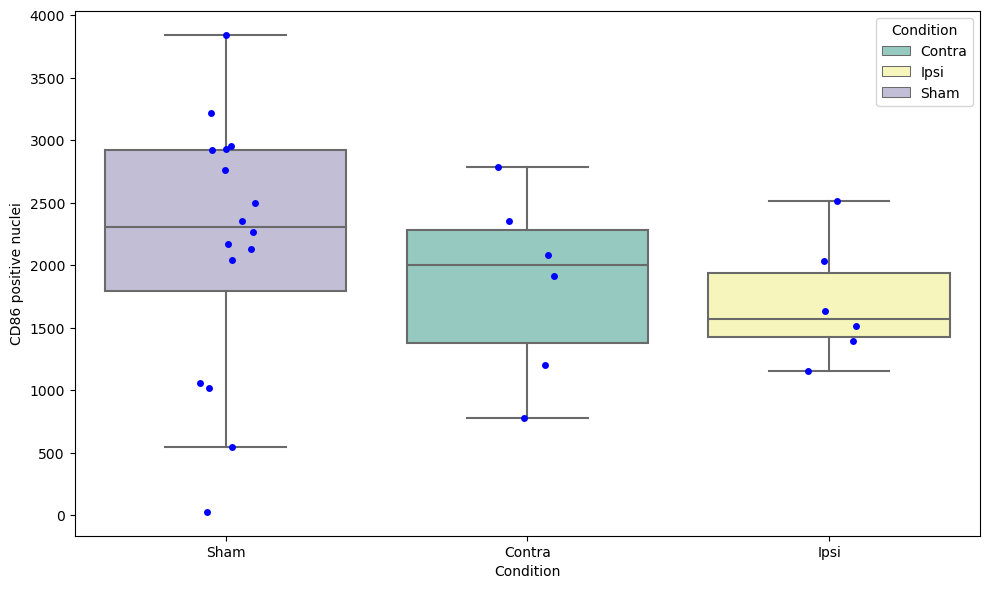

In [6]:
order = ['Sham', 'Contra', 'Ipsi']
plt.figure(figsize=(10, 6))  # Adjust size as needed
sns.boxplot(data=grouped_df, x='Condition', y=1, showfliers=False, order=order, hue='Condition', palette='Set3', dodge=False)
sns.stripplot(data=grouped_df, x='Condition', y=1, order=order, color='Blue', dodge=False)
plt.xlabel('Condition')
plt.ylabel('CD86 positive nuclei')
plt.legend(title='Condition')
plt.tight_layout()
#plt.savefig("plots/cd86Positive.pdf")
plt.show()

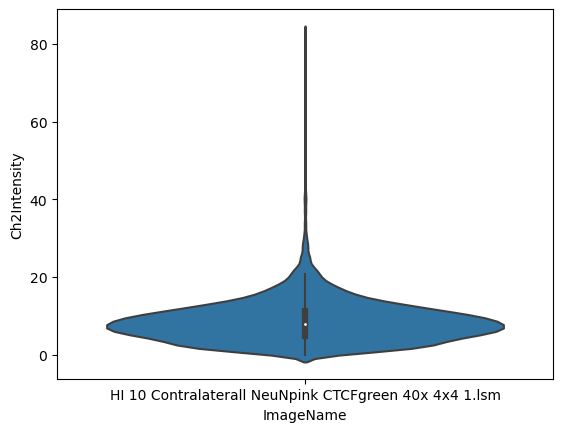

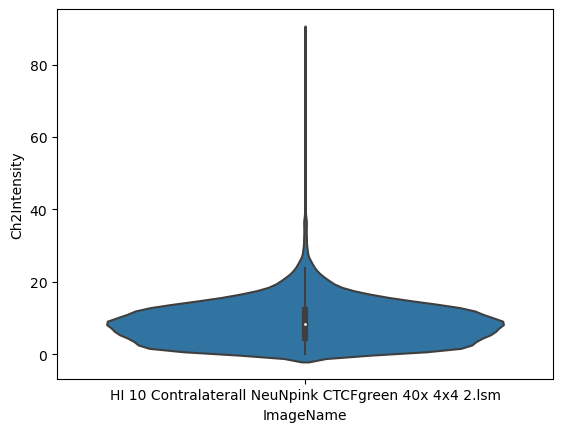

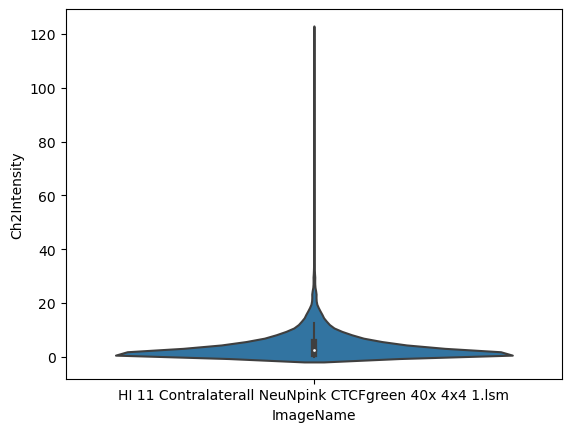

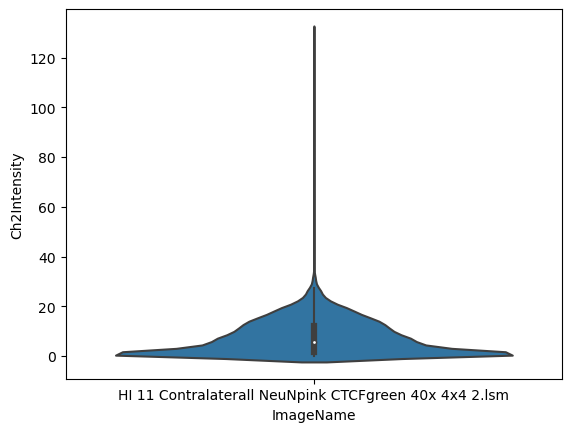

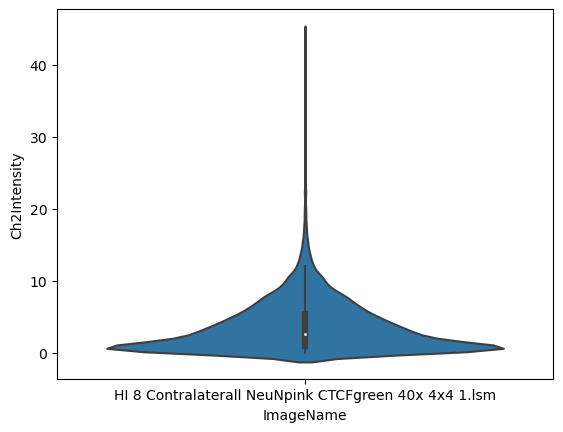

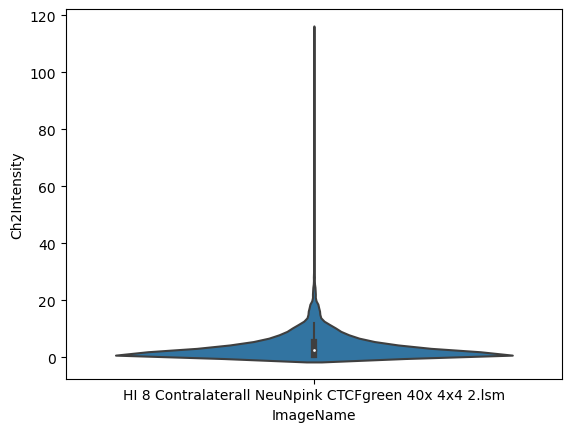

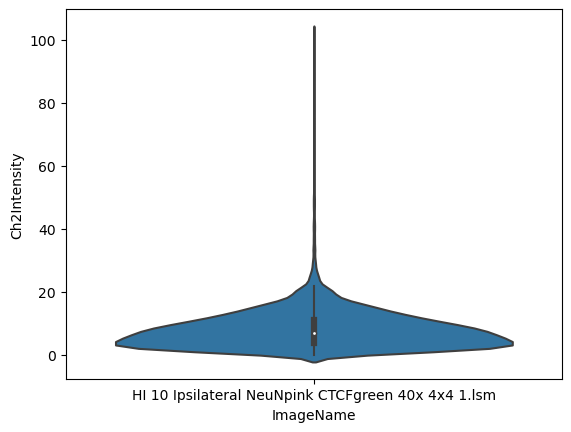

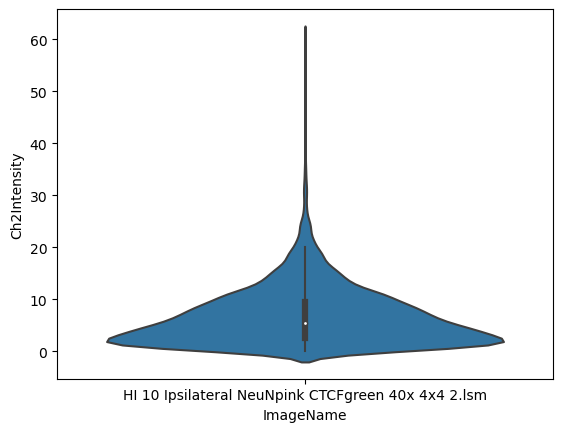

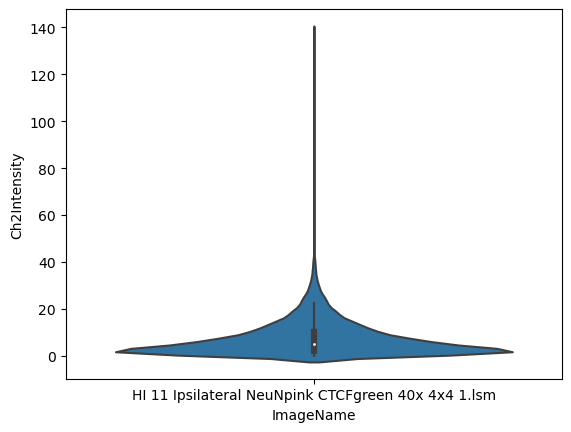

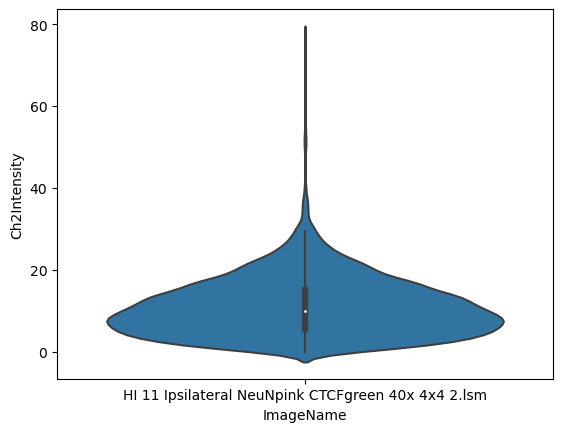

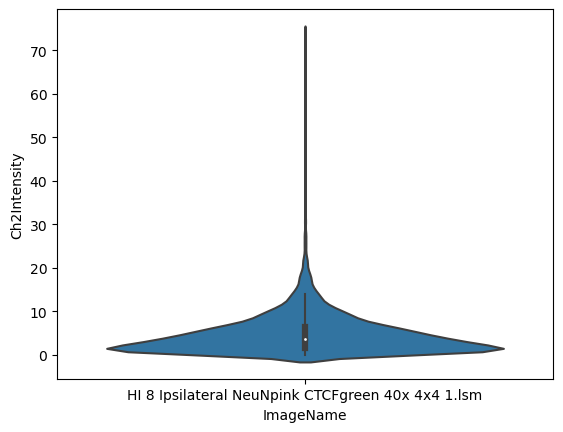

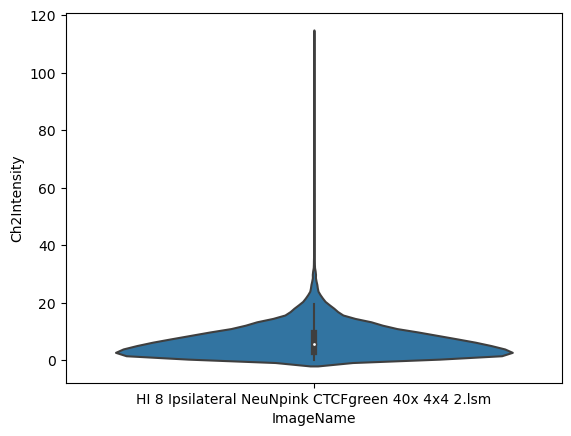

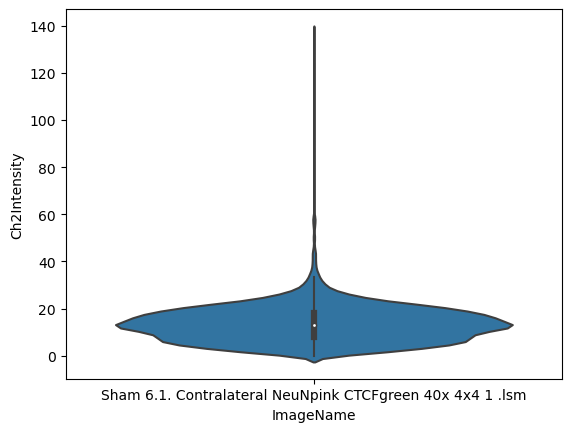

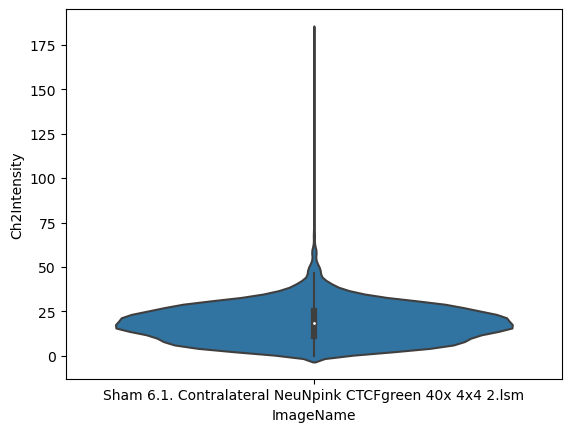

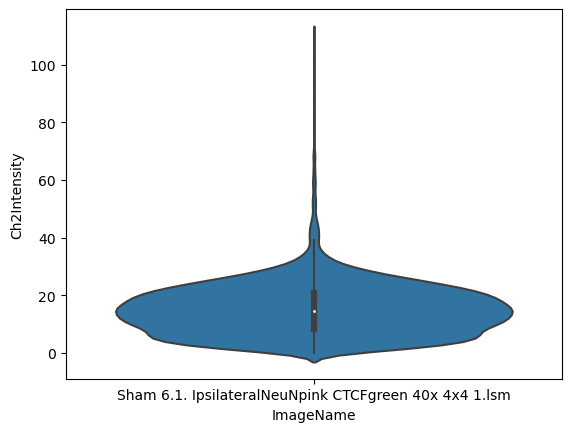

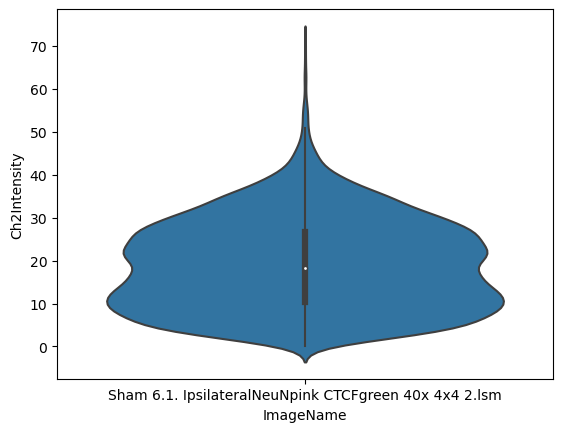

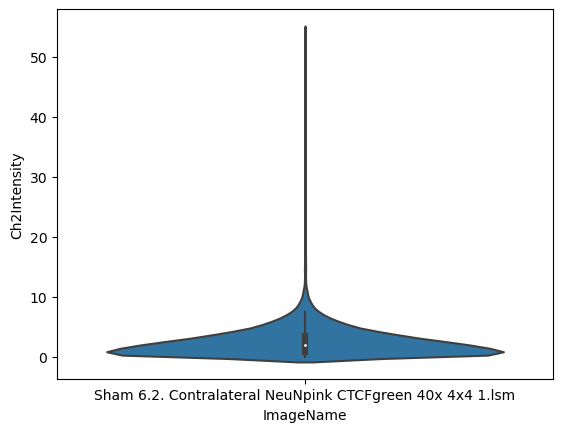

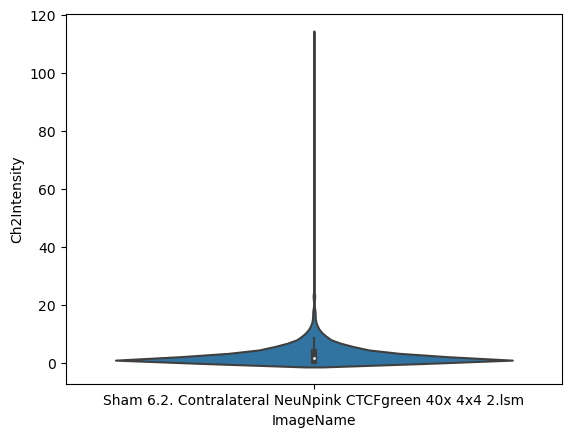

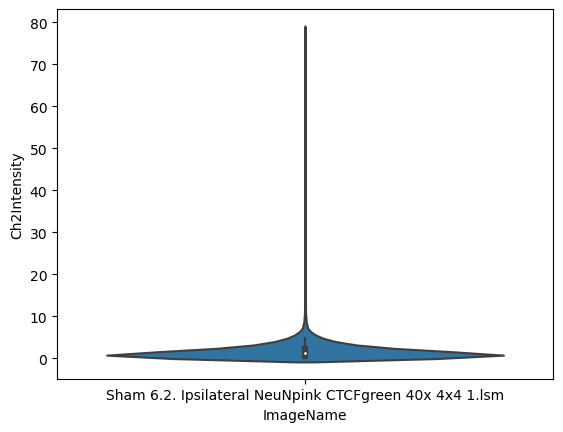

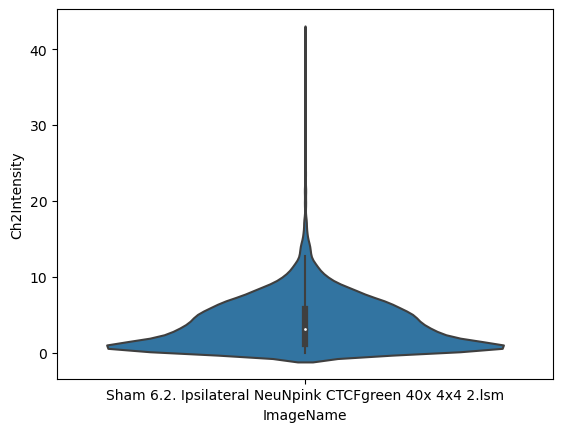

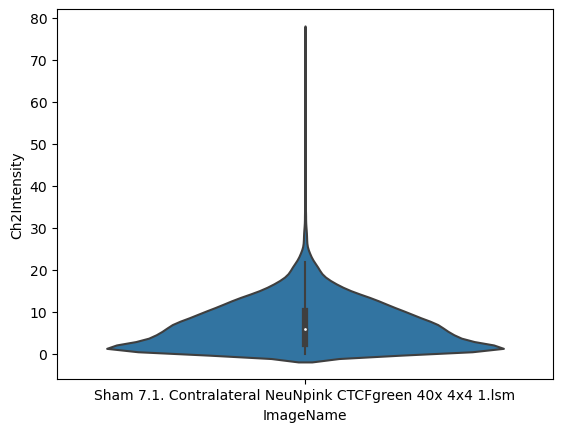

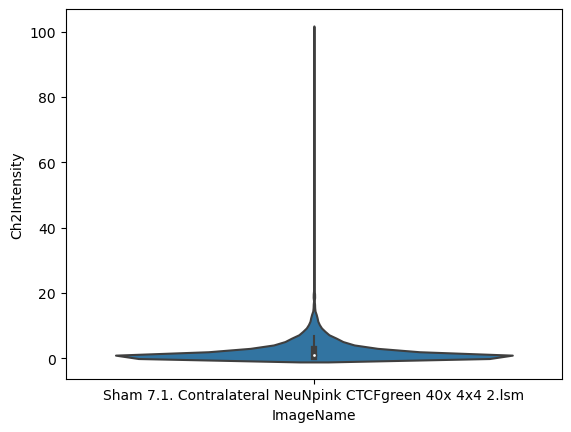

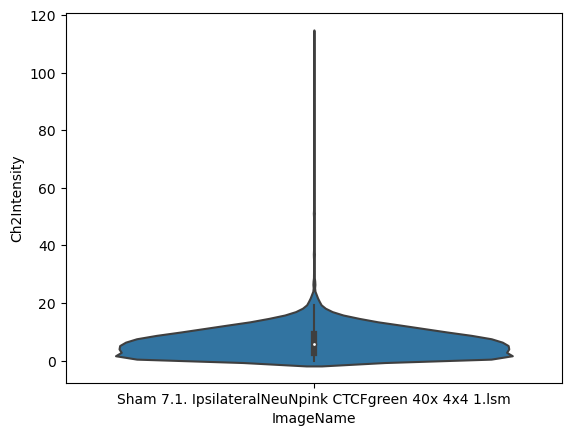

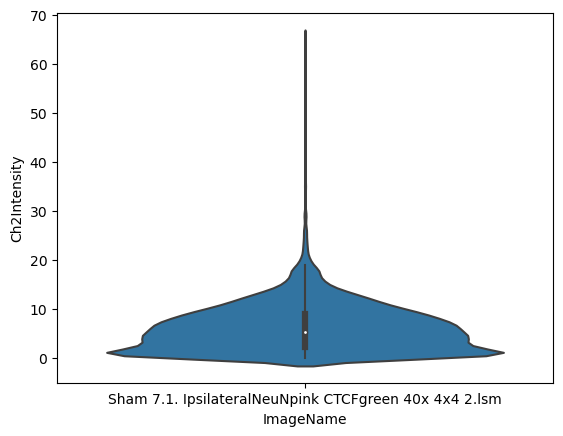

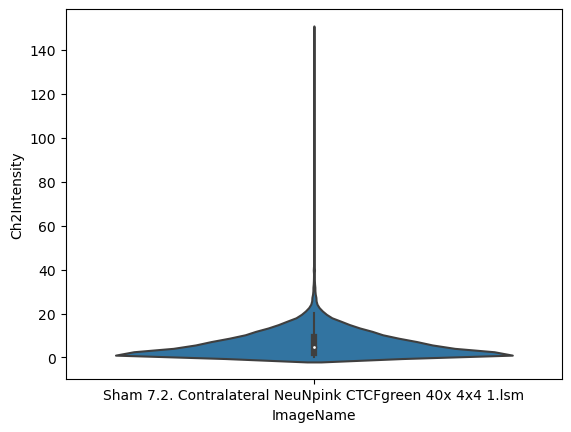

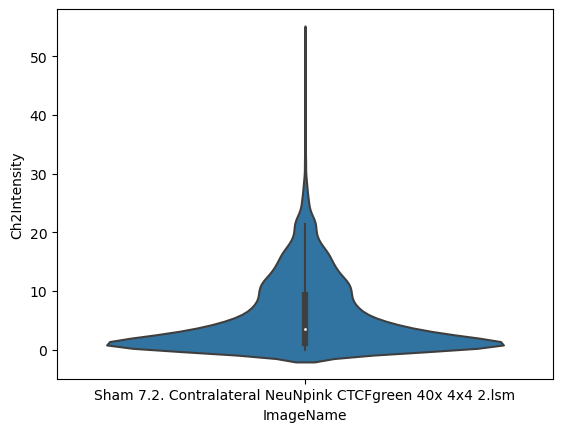

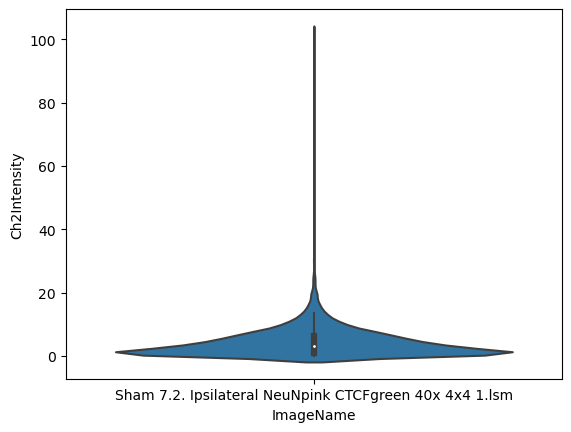

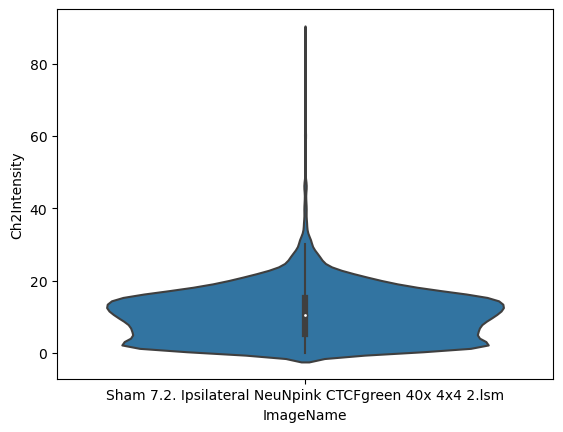

In [9]:
for name in nucleus_df['ImageName'].unique():
    df = nucleus_df[nucleus_df['ImageName'] == name]
    sns.violinplot(data=df, x='ImageName', y='Ch2Intensity')

    plt.show()